In [12]:
import pandas as pd
from datetime import datetime


In [2]:
df = pd.read_csv('property_data.csv')
df.head()

,BedRooms,Bath rooms,Size_sqft,location,year built,Garage Available,Furnishing,House Condition,Has_Pool,Lot Size,Price($)
0,3.0,1.0,1149,Rural,2004,NaN,Unfurnished,new,0.0,0.15,244043
1,NaN,2.0,1169,Rural,1989,1.0,NaN,Old,0.0,0.23,211250
2,4.0,3.0,1409,Suburban,1993,1.0,Unfurnished,gd,0.0,0.19,257239
3,3.0,3.0,1647,Suburban,2021,0.0,NaN,new,0.0,0.27,310316
4,2.0,3.0,1865,Urban,2009,0.0,furnised,old,1.0,0.39,334791


In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

Shape: (1000, 11)
Columns: [' BedRooms ', 'Bath rooms', 'Size_sqft', 'location', 'year built', 'Garage Available', 'Furnishing', 'House Condition', 'Has_Pool', 'Lot Size', 'Price($)']

Missing values:
  BedRooms            46
Bath rooms           59
Size_sqft             0
location              0
year built            0
Garage Available    104
Furnishing          157
House Condition       0
Has_Pool             55
Lot Size              0
Price($)              0
dtype: int64


In [4]:
# Clean column names
df.columns = (
    df.columns # Remove leading and trailing spaces, convert to lowercase, replace spaces with underscores
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("($)", "", regex=True) # Remove trailing dollar signs
)

In [5]:
# Rename cleaned columns
# Print to confirm
print("Cleaned columns:", df.columns.tolist())

Cleaned columns: ['bedrooms', 'bath_rooms', 'size_sqft', 'location', 'year_built', 'garage_available', 'furnishing', 'house_condition', 'has_pool', 'lot_size', 'price($)']


In [9]:
# Fix typos in categorical columns
df['furnishing'] = df['furnishing'].replace({
    'furnised': 'Furnished',
    'Unfurnished': 'Unfurnished',
    'Furnished': 'Furnished'
})
df['house_condition']= df['house_condition'].replace({
    'new': 'New',
    'Old': 'Old',
    'gd': 'Good',
    'old': 'Old',
})    
df.head()

,bedrooms,bath_rooms,size_sqft,location,year_built,garage_available,furnishing,house_condition,has_pool,lot_size,price($)
0,3.0,1.0,1149,Rural,2004,NaN,Unfurnished,New,0.0,0.15,244043
1,NaN,2.0,1169,Rural,1989,1.0,NaN,Old,0.0,0.23,211250
2,4.0,3.0,1409,Suburban,1993,1.0,Unfurnished,Good,0.0,0.19,257239
3,3.0,3.0,1647,Suburban,2021,0.0,NaN,New,0.0,0.27,310316
4,2.0,3.0,1865,Urban,2009,0.0,Furnished,Old,1.0,0.39,334791


In [10]:
# Fill missing values
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['bath_rooms'].fillna(df['bath_rooms'].median(), inplace=True)
df['garage_available'].fillna(0, inplace=True)
df['furnishing'].fillna('Unfurnished', inplace=True)
df['has_pool'].fillna(0, inplace=True)
df.head()

C:\Users\Russel Wangila\AppData\Local\Temp\ipykernel_9788\1015927235.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
C:\Users\Russel Wangila\AppData\Local\Temp\ipykernel_9788\1015927235.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,bedrooms,bath_rooms,size_sqft,location,year_built,garage_available,furnishing,house_condition,has_pool,lot_size,price($)
0,3.0,1.0,1149,Rural,2004,0.0,Unfurnished,New,0.0,0.15,244043
1,3.0,2.0,1169,Rural,1989,1.0,Unfurnished,Old,0.0,0.23,211250
2,4.0,3.0,1409,Suburban,1993,1.0,Unfurnished,Good,0.0,0.19,257239
3,3.0,3.0,1647,Suburban,2021,0.0,Unfurnished,New,0.0,0.27,310316
4,2.0,3.0,1865,Urban,2009,0.0,Furnished,Old,1.0,0.39,334791


In [11]:
# Final check
print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 bedrooms            0
bath_rooms          0
size_sqft           0
location            0
year_built          0
garage_available    0
furnishing          0
house_condition     0
has_pool            0
lot_size            0
price($)            0
dtype: int64


In [ ]:
current_year = datetime.now().year # created new column for house age
df['house_age'] = current_year - df['year_built']
df.head()

,bedrooms,bath_rooms,size_sqft,location,year_built,garage_available,furnishing,house_condition,has_pool,lot_size,price($),house_age
0,3.0,1.0,1149,Rural,2004,0.0,Unfurnished,New,0.0,0.15,244043,21
1,3.0,2.0,1169,Rural,1989,1.0,Unfurnished,Old,0.0,0.23,211250,36
2,4.0,3.0,1409,Suburban,1993,1.0,Unfurnished,Good,0.0,0.19,257239,32
3,3.0,3.0,1647,Suburban,2021,0.0,Unfurnished,New,0.0,0.27,310316,4
4,2.0,3.0,1865,Urban,2009,0.0,Furnished,Old,1.0,0.39,334791,16


In [ ]:
# Convert categorical variables to dummy variables since ML models require numerical input
df = pd.get_dummies(df, columns=['location', 'furnishing', 'house_condition'], drop_first=True)
df.head()

,bedrooms,bath_rooms,size_sqft,year_built,garage_available,has_pool,lot_size,price($),house_age,location_Suburban,location_Urban,location_ruraal,location_sub-urban,location_urbn,furnishing_Semi furnished,furnishing_Semi-Furnished,furnishing_Unfurnished,house_condition_New,house_condition_Old
0,3.0,1.0,1149,2004,0.0,0.0,0.15,244043,21,False,False,False,False,False,False,False,True,True,False
1,3.0,2.0,1169,1989,1.0,0.0,0.23,211250,36,False,False,False,False,False,False,False,True,False,True
2,4.0,3.0,1409,1993,1.0,0.0,0.19,257239,32,True,False,False,False,False,False,False,True,False,False
3,3.0,3.0,1647,2021,0.0,0.0,0.27,310316,4,True,False,False,False,False,False,False,True,True,False
4,2.0,3.0,1865,2009,0.0,1.0,0.39,334791,16,False,True,False,False,False,False,False,False,False,True


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('price($)', axis=1) # separate features from target variable(price)
y = df['price($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
#train the model using Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 9200.729716753856
MAE: 7072.56714673657
R² Score: 0.9774002602320864


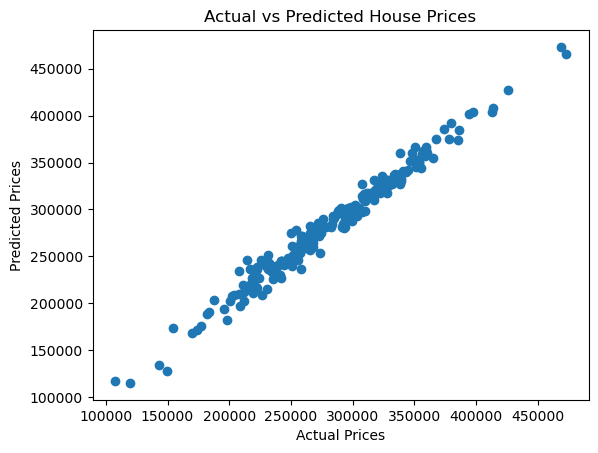

In [19]:
# Visualize the results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [20]:
# Save cleaned dataset
df.to_csv("cleaned_property_data.csv", index=False)
